In [1]:
import numpy as np
import pandas as pd

In [19]:
data=pd.read_csv("tech_sort1k.csv")
data.head(15)

,id,exact_matched_patt_contextual,summaries,Note
0,zsDSYc5UzpyXekOABZBfnQ_0000,NaN,senior director of clinical services housing a...,NaN
1,zs1YNrrCeorFkGLEXSSp-A_0000,NaN,i believe that passions are meant to be shared...,NaN
2,zowirq8ZhxhchApaRMhNSA_0000,NaN,bill bryant is founder and chairman of bryant ...,NaN
3,zoQVkPCfXB9n3AaPGHHwzg_0000,NaN,undertaking a trilingual masters degree in eur...,NaN
4,zmIr2glBZ3Ef8CSS0jw1og_0000,NaN,career objective a role within marketing and n...,NaN
5,zlqc-BC1ZHf1EqoAGZ3sag_0000,NaN,an it professional with over 14+ years of exte...,NaN
6,zlBvzxx47BewWlO67-zK3Q_0000,['republic'],i am a 19 year old entrepreneur and manager of...,NaN
7,zekuTL0ONYTX2XawUBa-9A_0000,['dell'],i am a self motivated professional with 13+ ye...,NaN
8,zaByWGsar5hVdBWLEYykcg_0000,"['wordpress', 'joomla', 'drupal']",as owner and director of projects at metro inf...,NaN
9,zPnnWGWHb2gSYnd98GKaag_0000,['unity'],15+ years within the recruiting industry combi...,NaN


In [3]:
data=data.drop(columns=["id","Note"])

In [4]:
#replacing null vals with empty list
data['exact_matched_patt_contextual'] = [ [] if x is np.NaN else x for x in data['exact_matched_patt_contextual'] ]


In [5]:
import nltk
import re
from bs4 import BeautifulSoup

nltk.download("punkt")

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    return text


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohitbagaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
data['exact_matched_patt_contextual']=data['exact_matched_patt_contextual'].astype(str)

In [7]:
#converting lists to strings with proper cleaning
data["to_match"]=data["exact_matched_patt_contextual"].apply(clean_text)

In [8]:
data.head(10)

,exact_matched_patt_contextual,summaries,to_match
0,[],senior director of clinical services housing a...,
1,[],i believe that passions are meant to be shared...,
2,[],bill bryant is founder and chairman of bryant ...,
3,[],undertaking a trilingual masters degree in eur...,
4,[],career objective a role within marketing and n...,
5,[],an it professional with over 14+ years of exte...,
6,['republic'],i am a 19 year old entrepreneur and manager of...,republic
7,['dell'],i am a self motivated professional with 13+ ye...,dell
8,"['wordpress', 'joomla', 'drupal']",as owner and director of projects at metro inf...,wordpress joomla drupal
9,['unity'],15+ years within the recruiting industry combi...,unity


In [9]:
data["summaries"]=data["summaries"].apply(clean_text)

In [10]:
def convert(lst):
	return ' '.join(lst).split()

In [13]:
def givedata(tech_words,sentence):
    broken_list = convert([sentence])
    prev_tag="O" # inital tag will be "O" or "B" or "I"
    tech_words=convert([tech_words])
    tag_col=[]
    for word in broken_list:
        curr_tag="O" 
        if word in tech_words:
            if (prev_tag=='B' or prev_tag=='I'): #if word found in dictionary
                curr_tag='I' #if prev_tag was already a tech word
            else:
                curr_tag='B' #if prev_tag was "O" (Not a tech word)
        prev_tag=curr_tag
        tag_col.append(curr_tag) #adding tag
    return pd.DataFrame(list(zip(broken_list, tag_col)),columns =['Word', 'Tag'])

In [14]:
final_data=pd.DataFrame()

for i in range(0,len(data)):
#     print(i)
    temp = givedata(data.iloc[i,2],data["summaries"][i])
    length = len(temp)
    wordd="Sentence :"+str(i+1) #sentence no.
    a=[wordd]*length
    temp.insert(0,"Sentence #",a)
    final_data = final_data.append(temp, ignore_index=True) #appending sentences in the required format
               

/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


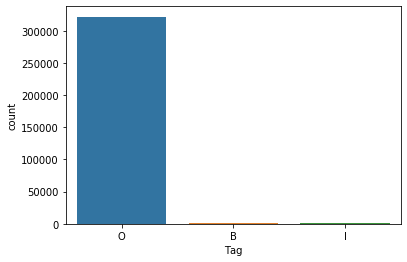

In [17]:
import seaborn as sns

sns.countplot(final_data['Tag'])

In [18]:
final_data['Tag'].value_counts()

O    322061
B      1730
I       571
Name: Tag, dtype: int64

In [20]:
# final_data.loc[final_data['Tag']=='I']
# final_data.loc[final_data['Tag'].isin(['I','B'])]

In [21]:
"""All tagged data, without any filter"""
# final_data.to_csv('TECH_bio_tagging.csv',index=False) 

'All tagged data, without any filter'

In [22]:
final_data.head()

,Sentence #,Word,Tag
0,Sentence :1,senior,O
1,Sentence :1,director,O
2,Sentence :1,of,O
3,Sentence :1,clinical,O
4,Sentence :1,services,O
